# Lab 8.3.1

In [1]:
library(tree)
library(ISLR)
attach(Carseats)

In [2]:
High=factor(ifelse(Sales <=8,"No","Yes"))
Carseats =data.frame(Carseats ,High)

In [3]:
tree.carseats =tree(High~.-Sales , Carseats )

In [4]:
summary(tree.carseats )


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

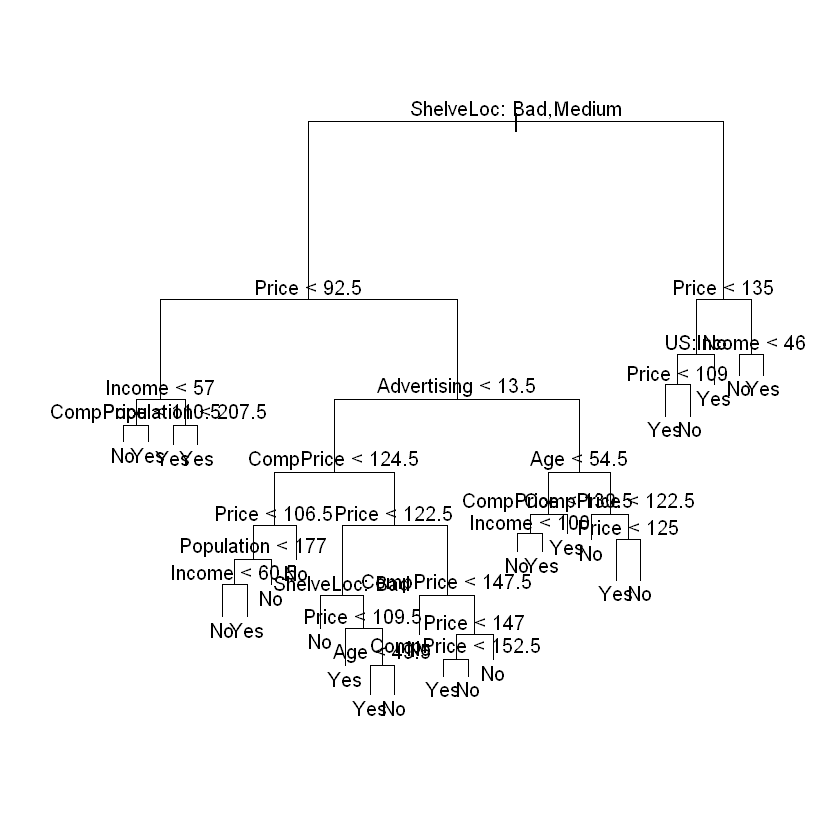

In [6]:
plot(tree.carseats )
text(tree.carseats ,pretty =0)

In [7]:
print(tree.carseats)

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [10]:
set.seed(2)
train=sample (1: nrow(Carseats ), 200)
Carseats.test=Carseats [-train ,]
High.test=High[-train]
tree.carseats =tree(High~.-Sales , Carseats ,subset=train)
 tree.pred=predict(tree.carseats ,Carseats.test ,type="class")
print(table(tree.pred ,High.test))

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50


In [11]:
 (86+57) /200

[1] 0.715

In [12]:
set.seed(3)
cv.carseats =cv.tree(tree.carseats ,FUN=prune.misclass )
print(names(cv.carseats ))

[1] "size"   "dev"    "k"      "method"


In [13]:
print(cv.carseats)

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"


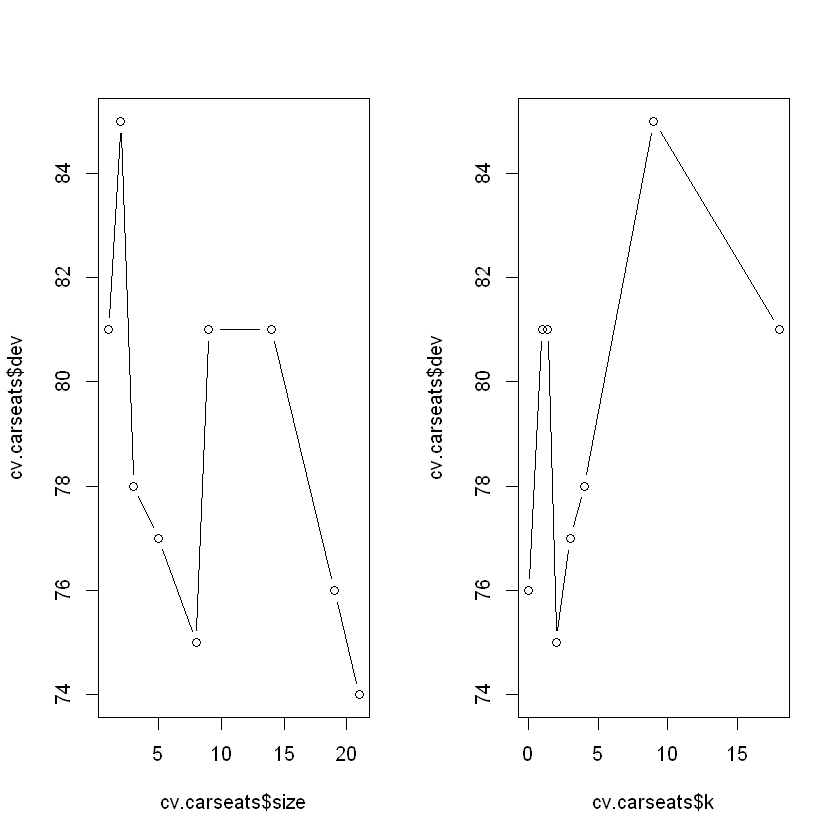

In [14]:
par(mfrow=c(1,2))
plot(cv.carseats$size ,cv.carseats$dev ,type="b")
plot(cv.carseats$k ,cv.carseats$dev ,type="b")

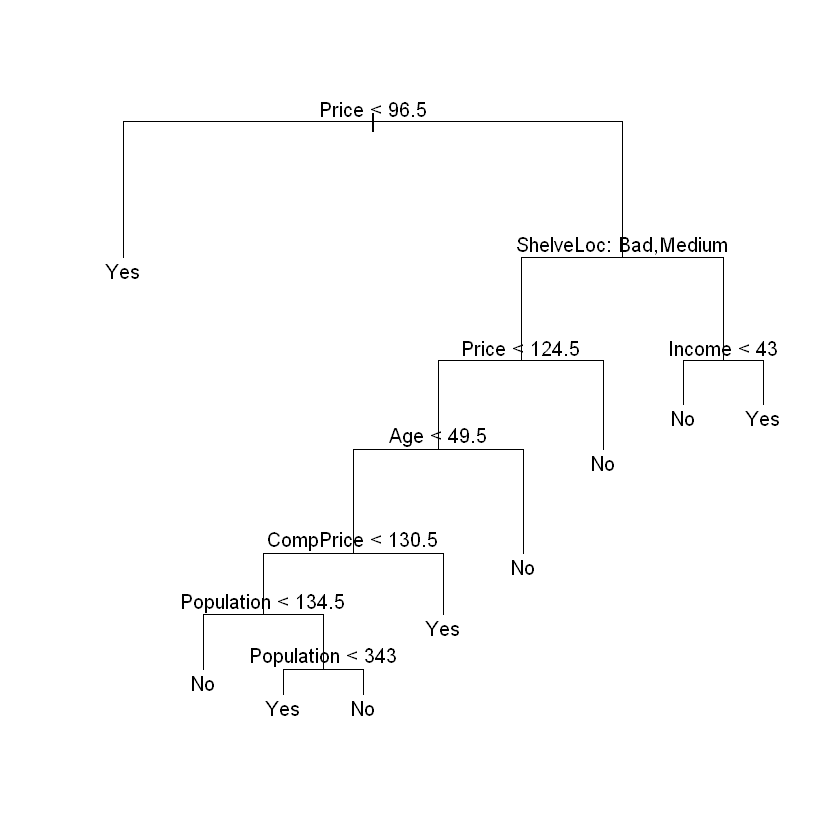

In [15]:
prune.carseats =prune.misclass(tree.carseats ,best=9)
plot(prune.carseats )
 text(prune.carseats ,pretty =0)

In [17]:
tree.pred=predict(prune.carseats ,Carseats.test , type="class")
print(table(tree.pred ,High.test))

         High.test
tree.pred No Yes
      No  97  25
      Yes 20  58


In [18]:
 (94+60) /200

[1] 0.77

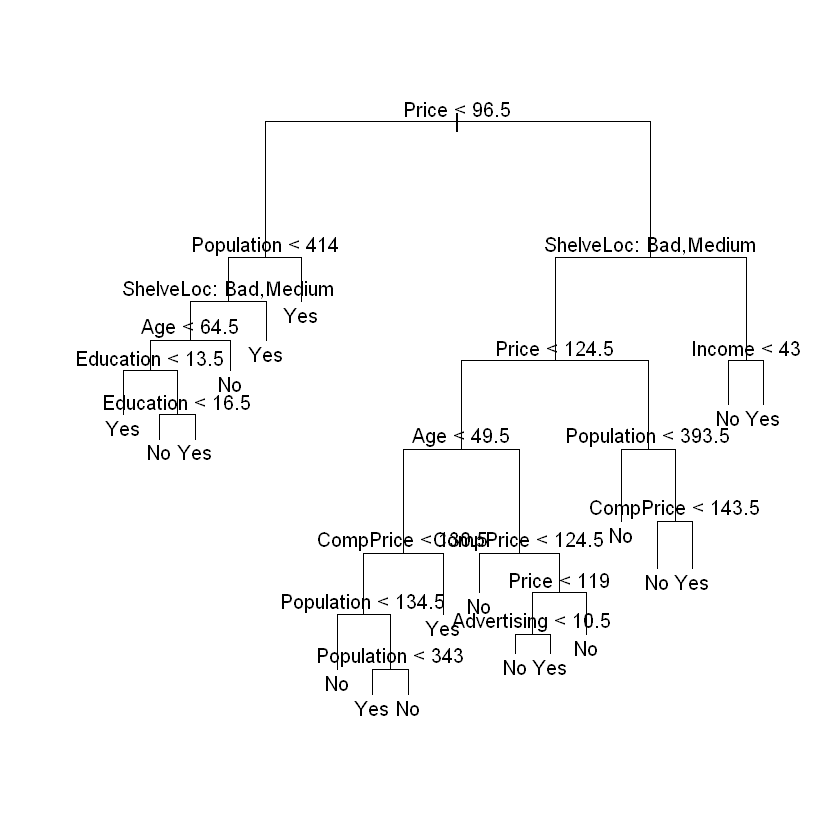

In [22]:
prune.carseats =prune.misclass (tree.carseats ,best=15)
plot(prune.carseats )
text(prune.carseats ,pretty =0)

In [23]:
tree.pred=predict(prune.carseats ,Carseats.test , type="class")
print(table(tree.pred ,High.test))

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53


In [24]:
(102 + 53)/200

[1] 0.775

# Lab 8.3.2

In [26]:
library(MASS)
set.seed(1)
train = sample (1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston , subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

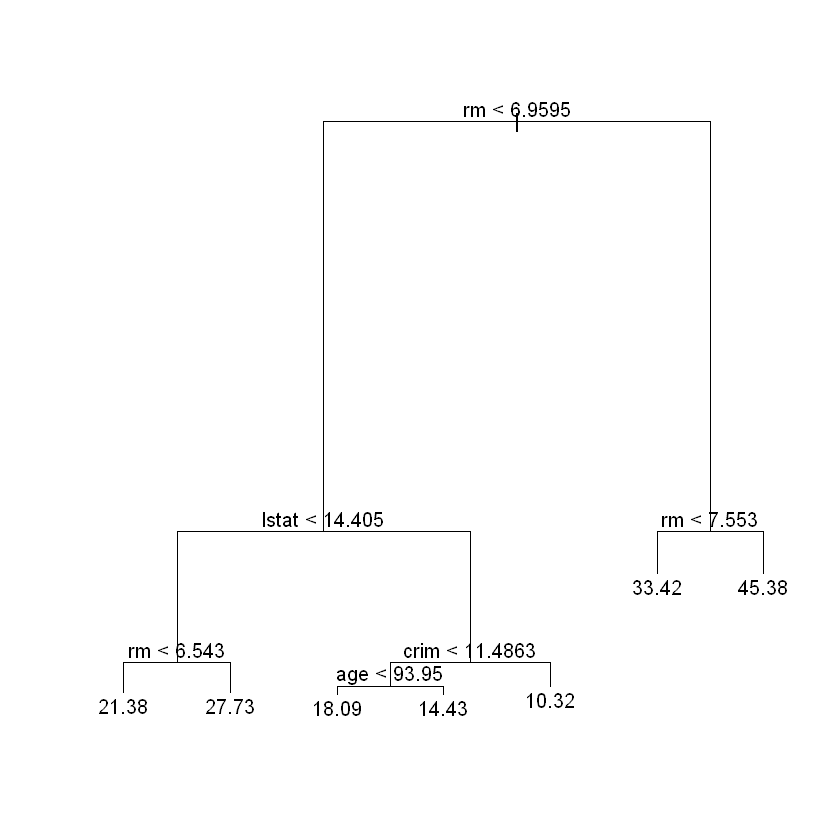

In [28]:
plot(tree.boston)
 text(tree.boston , pretty =0)

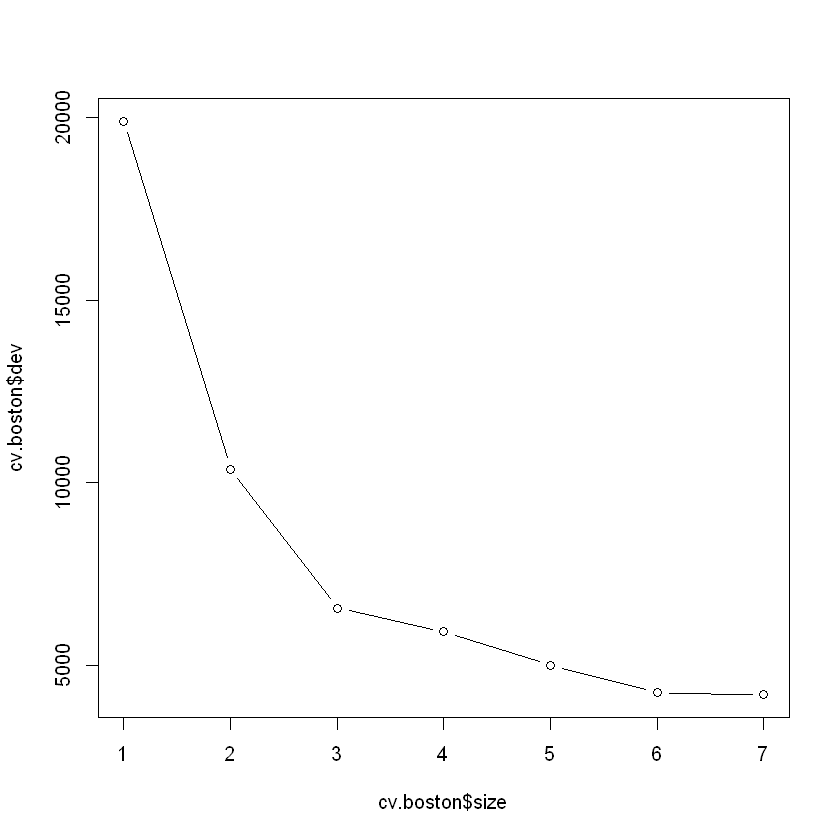

In [30]:
 cv.boston=cv.tree(tree.boston)
 plot(cv.boston$size ,cv.boston$dev ,type='b')

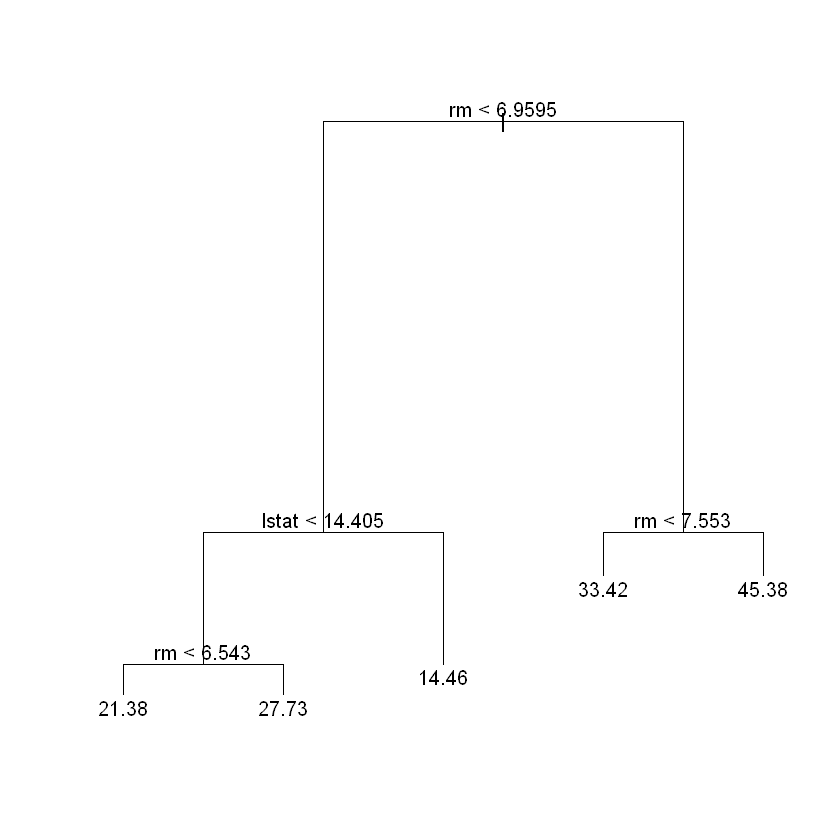

In [32]:
prune.boston=prune.tree(tree.boston ,best=5)
plot(prune.boston)
text(prune.boston , pretty =0)

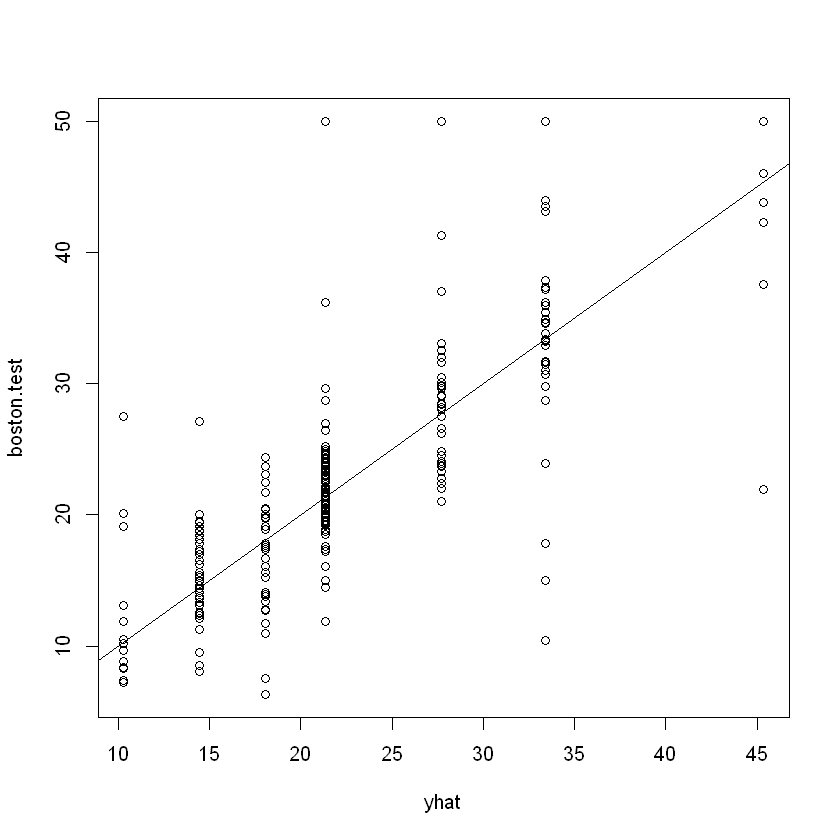

In [33]:
yhat=predict (tree.boston ,newdata=Boston[- train ,])
boston.test=Boston[-train ,"medv"]
 plot(yhat ,boston.test)
abline (0,1)

In [34]:
mean((yhat -boston.test)^2)

[1] 35.28688